In [1]:
import matplotlib.pyplot as plt
from Functions.connection.connection import *
from Functions.Models.Logistic_regression import *
from Functions.Models.Random_forest import *
from Functions.Models.xgboost import *
from Functions.Models.evaluation import *
from Functions.Pipelines.pipeline_NLP import *


2023-05-29 18:06:17.153664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 18:06:17.893067: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
alertP1=connection("credentials.csv")
#alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")


Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
712


/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
data = pre_process(alertP1)

/home/marouankamoun/Desktop/PBL-HGO/Functions/AlertP1/data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
/home/marouankamoun/Desktop/PBL-HGO/Functions/AlertP1/data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
/home/marouankamoun/Desktop/PBL-HGO/Functions/AlertP1/data_cleaning.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

# XGBOOST

In [206]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text_caveman','clean_text','chi_squared']#'chi_squared'
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
y_pred_train, y_pred_test, model_score, X_train, X_test, y_train, y_test = xgb_classifier(X,y)

In [207]:
evaluate_thresholds_all(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Default,0.50,0.80,0.94,0.80,0.89
1,Precision-Recall trade-off,0.45,0.80,0.98,0.79,0.88
2,Balanced Accuracy,0.70,0.74,0.69,0.91,0.91
3,Cohen's Kappa,0.57,0.80,0.90,0.83,0.90
4,Limit to K,0.64,0.78,0.82,0.86,0.89


In [208]:
evaluate_thresholds_all(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Default,0.50,0.69,0.94,0.69,0.69
1,Precision-Recall trade-off,0.45,0.69,0.98,0.69,0.68
2,Balanced Accuracy,0.70,0.68,0.69,0.79,0.74
3,Cohen's Kappa,0.57,0.72,0.91,0.73,0.72
4,Limit to K,0.64,0.72,0.82,0.77,0.78


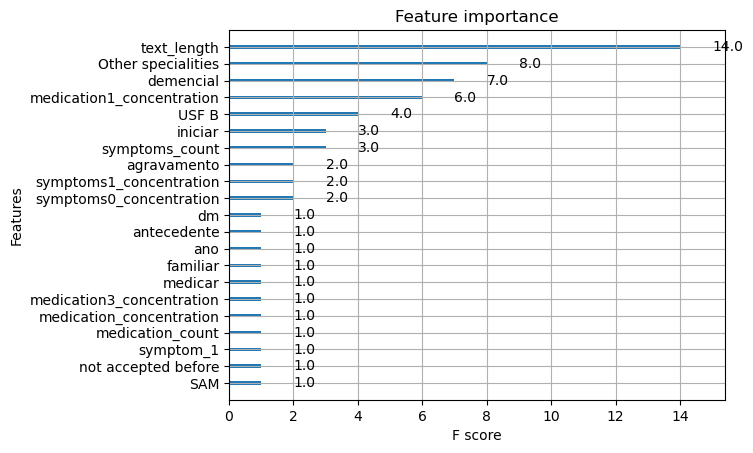

In [10]:
from xgboost import plot_importance

# Plot the feature importance scores
plot_importance(model_score)
plt.show()

# Fine tuning

In [218]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text_caveman','clean_text','chi_squared']#'chi_squared'
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical = True)
dtest = xgb.DMatrix(X_test, enable_categorical = True)

# Set parameters for the XGBoost model
param = {
        'max_depth': 2,
        'eta': 0.4,
        'objective': 'binary:logistic',
        'seed': 16
    }

# Train the model
num_round = 6
bst = xgb.train(param, dtrain, num_round)

# Make preictions on the train set
y_pred_train = bst.predict(dtrain)
# Make predictions on the test set
y_pred_test = bst.predict(dtest)

Recall test: 0.95
Precision test: 0.72
              precision    recall  f1-score   support

     refused       0.76      0.32      0.45       111
    accepted       0.72      0.95      0.82       211

    accuracy                           0.73       322
   macro avg       0.74      0.63      0.63       322
weighted avg       0.74      0.73      0.69       322



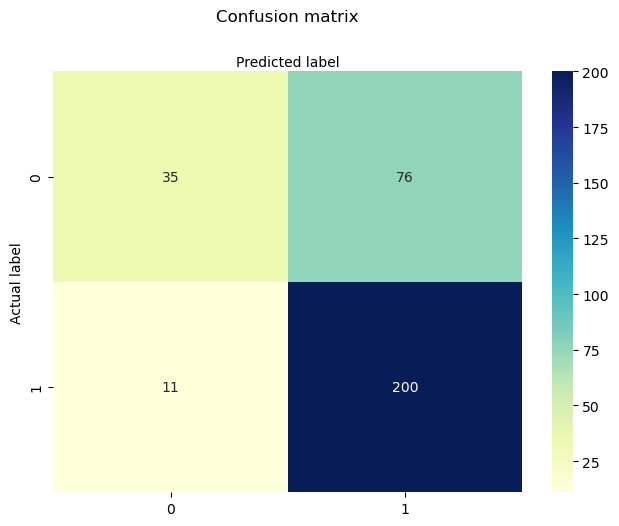

In [219]:
#cohen's kappa
thresholds = np.linspace(0, 1, 100)

kappas = [cohen_kappa_score(y_train, (y_pred_train >= t).astype(int)) for t in thresholds]

kappa_threshold = thresholds[np.argmax(kappas)]

kappa_y_pred_binary = (y_pred_test >= kappa_threshold).astype(int)
# Evaluate the recall of the test
recall_test = recall_score(y_test,kappa_y_pred_binary)
print("Recall test: {:.2f}".format(recall_test))

# Evaluate the precision of the train
precision_test = precision_score(y_test,kappa_y_pred_binary)
print("Precision test: {:.2f}".format(precision_test))
# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, kappa_y_pred_binary)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, kappa_y_pred_binary, target_names=target_names))

In [217]:
evaluate_thresholds_all(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Default,0.50,0.69,1.00,0.68,0.69
1,Precision-Recall trade-off,0.38,0.67,1.00,0.67,0.67
2,Balanced Accuracy,0.66,0.70,0.72,0.80,0.76
3,Cohen's Kappa,0.60,0.73,0.95,0.72,0.72
4,Limit to K,0.63,0.73,0.83,0.77,0.77
